# Linear Regression with one variable

__First we need some data. Let us use the oceanographic data provided on Canvas.__ __"m3mt1.cnv2Oceanography.xlsx"__

Data from: http://adcp.tamu.edu/~stevendimarco/OCNG657/data_portal.html 

__Below is the file description.__


*******************************************************************
** Program Title: Mechanisms Controlling Hypoxia                 **
**                    on the Louisiana Shelf                     **
**                                                               **
** Sponsored by: National Oceanic and Atmospheric Administration **
**               Center for Sponsored Coastal Ocean Research     **
**               Coastal Ocean Program                           **
**               NOAA/CSCOR/COP NA03NOS4780039                   **
**                                                               **
** Conducted by: Dept. of Oceanography, Texas A&M University     **
**                                                               **
** Archived by : The National Oceanograpic Data Center (NODC)    **
**               NODC Project Code 0490                          **
**                                                               **
** For questions regarding these data please contact:            **
** Dr. Matthew K. Howard                                         **
** Department of Oceanography, Texas A&M University              **
** College Station, TX 77843-3146                                **
** (979)-862-4169 (voice), email: mkhoward@tamu.edu              **
*******************************************************************
CTD PROFILE DATA
PLATFORM       : R/V GYRE CRUISE 04G08
MCHCRUISE ID   : M3
STATION NAME   :     m3mt1
STATION NUMBER : 028
CAST DATE-TIME : 08/23/2004 10:03 MM/DD/YYYY HH:MM UTC
LATITUDE       :  28.5420 N
LONGITUDE      :  89.8287 W
CAST DEPTH (m) :  449.5
WATER DEPTH (m):  484.5
INSTRUMENT TYPE: Sea-Bird SBE-911-Plus
SBE Software   : SBE Data Processing V5.37b
RAW DATA FILE  :    m3mt1.cnv
**********************************************************
* Column  1: Pressure (Digiquartz, db)
* Column  2: Depth (salt water, meters)
* Column  3: Temperature (ITS-90, deg C)
* Column  4: Potential temperature (ITS-90, deg C)
* Column  5: Conductivity (S/m)
* Column  6: Salinity (PSS-78 psu)
* Column  7: Sigma-theta (kg/m^3)
* Column  8: Dissolved Oxygen (SBE 43 ml/l)
* Column  9: Dissolved Oxygen (SBE 43 volts)
* Column 10: Transmission (percent)
* Column 11: Transmission (volts)
* Column 12: Irradiance (PAR, microEinsteins/m^2/sec)
* Column 13: Irradiance (PAR, Biospherical/Licor, volts)
* Column 14: Fluorescence (Chelsea Aqua 3, Chl Con ug/l)
* Column 15: Fluorescence (Chelsea Aqua 3, volts)
* Column 16: Optical Backscatter (OBS, particle concentration mg/l)
* Column 17: Optical Backscatter (OBS, volts)
**********************************************************

__Let's start by importing some libraries and examining the data.__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

__Let us set Path and Read All data from Excel File__

In [2]:
import os
path = os.getcwd() + '\\m3mt1.cnv2Oceanography.xlsx'
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
data = pd.read_excel(path, sheet_name='Data', header=0)
data.head()

,Press,Depth,Temp,PoTemp,Cond,Sal,Sig-Th,O2,O2V,%Tran,Tran-V,PAR,PAR-V,FL,FL-V,OBS,OBS-V
0,2.029,2.0,29.2181,29.2176,5.117671,30.6912,18.7610,3.11825,2.6277,87.1428,4.3332,2.46,0,0.2988,1.5512,2.1956,1.4638
1,2.515,2.5,29.1836,29.1830,5.155940,30.9706,18.9817,3.03783,2.5782,87.4587,4.3488,2.46,0,0.3110,1.5668,2.2090,1.4727
2,3.022,3.0,29.0726,29.0719,5.250992,31.6847,19.5534,2.97902,2.5406,88.4276,4.3963,2.46,0,0.3183,1.5756,2.1757,1.4505
3,3.523,3.5,29.0585,29.0577,5.256201,31.7292,19.5914,2.97916,2.5412,89.1755,4.4330,2.46,0,0.2836,1.5293,2.1541,1.4361
4,4.027,4.0,29.0545,29.0535,5.270189,31.8264,19.6657,2.97309,2.5384,89.8300,4.4651,2.46,0,0.2275,1.4397,2.1493,1.4329


In [3]:
data.describe()

,Press,Depth,Temp,PoTemp,Cond,Sal,Sig-Th,O2,O2V,%Tran,Tran-V,PAR,PAR-V,FL,FL-V,OBS,OBS-V
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,8.960000e+02,896.0,896.000000,896.000000,896.000000,896.000000
mean,227.437128,225.750000,13.987610,13.959502,4.273966,35.518684,26.432914,2.116258,1.666944,91.666946,4.555173,2.460000e+00,0.0,0.045333,0.770554,2.183024,1.455349
std,130.413729,129.398609,5.986231,5.997882,0.632747,0.667571,1.381254,0.509307,0.441299,1.970224,0.096622,2.577156e-14,0.0,0.052405,0.229042,0.110986,0.073990
min,2.029000,2.000000,8.329600,8.281900,3.673362,30.691200,18.761000,1.775910,1.350400,83.074700,4.133800,2.460000e+00,0.0,0.012000,0.525700,2.022100,1.348100
25%,114.670250,113.875000,9.692125,9.653025,3.811639,35.161925,26.409375,1.804960,1.383100,91.865875,4.564900,2.460000e+00,0.0,0.020300,0.632275,2.149600,1.433125
50%,227.396500,225.750000,11.241500,11.212900,3.976329,35.361100,27.038250,1.875055,1.459000,92.485700,4.595300,2.460000e+00,0.0,0.023600,0.668900,2.168050,1.445350
75%,340.181250,337.625000,17.272375,17.253075,4.665140,36.089625,27.143700,2.095650,1.712625,92.664100,4.604025,2.460000e+00,0.0,0.042725,0.832550,2.189625,1.459725
max,453.022000,449.500000,29.658200,29.655600,5.931757,36.439500,27.240200,3.494720,2.780300,92.883800,4.614900,2.460000e+00,0.0,0.318300,1.575600,2.667200,1.778200


<AxesSubplot:xlabel='Depth', ylabel='Cond'>

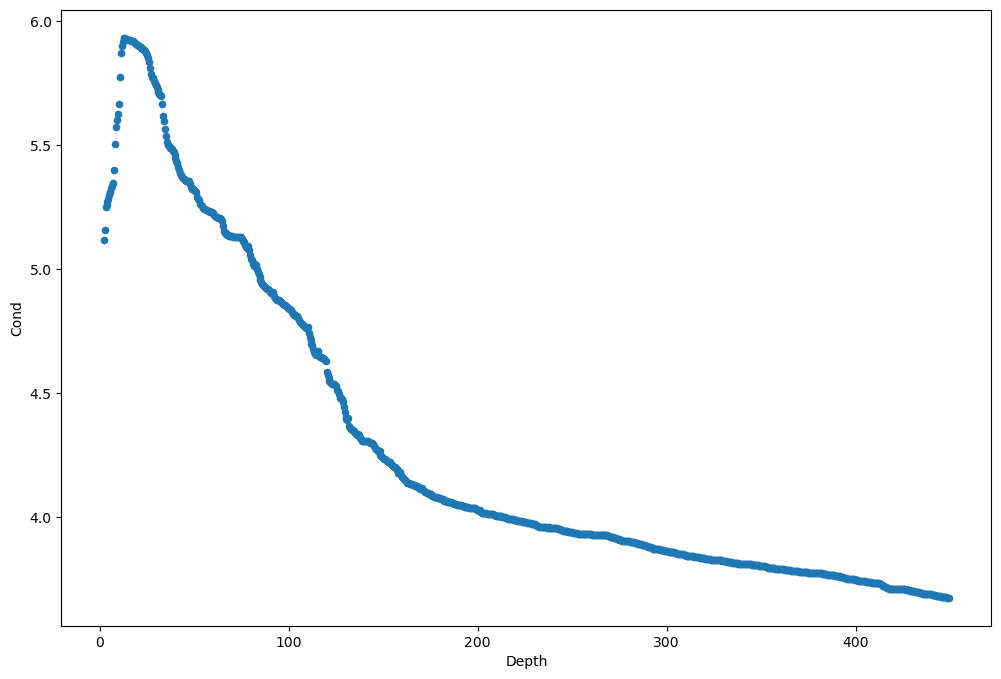

In [4]:
data.plot(kind='scatter', x='Depth', y='Cond', figsize=(12,8))

__Extract Required Data__

In [5]:
XY = data.loc[:, ['Depth','Cond']]

In [6]:
XY = XY[XY.Depth>200]

In [7]:
XY.head(5)

,Depth,Cond
397,200.5,4.024289
398,201.0,4.025200
399,201.5,4.020897
400,202.0,4.015239
401,202.5,4.014372


<AxesSubplot:xlabel='Depth', ylabel='Cond'>

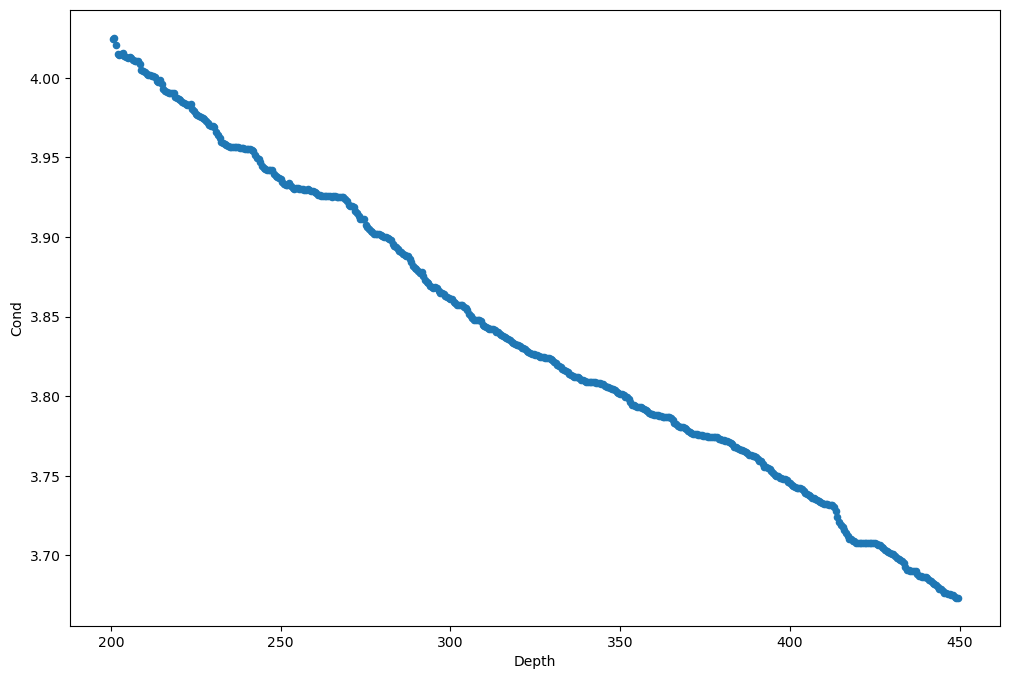

In [8]:
XY.plot(kind='scatter', x='Depth', y='Cond', figsize=(12,8))

In [9]:
# Assigning dataset to template X & y
X = XY.iloc[:, :-1].values # All except last column
y = XY.iloc[:, -1].values # Last Column

In [10]:
print(X[0:4,:])

[[200.5]
 [201. ]
 [201.5]
 [202. ]]


In [11]:
print(y[0:4])

[4.024289 4.0252   4.020897 4.015239]


In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [13]:
[X_train.size, y_train.size, X_test.size, y_test.size]

[332, 332, 167, 167]

In [14]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

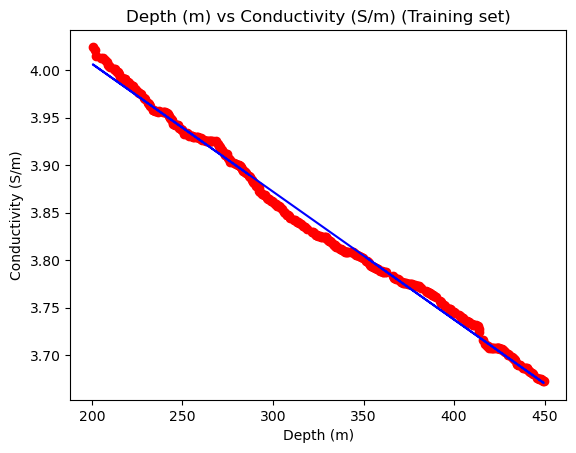

In [16]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Depth (m) vs Conductivity (S/m) (Training set)')
plt.xlabel('Depth (m)')
plt.ylabel('Conductivity (S/m)')
plt.show()

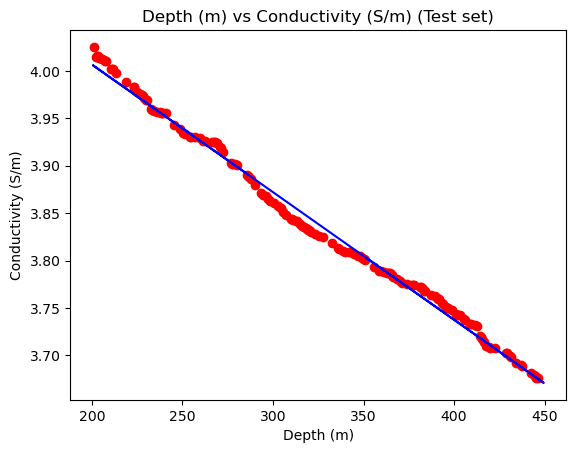

In [17]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Depth (m) vs Conductivity (S/m) (Test set)')
plt.xlabel('Depth (m)')
plt.ylabel('Conductivity (S/m)')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients Slope: %.6f' % regressor.coef_)
print('Coefficients Intercept: %.6f' % regressor.intercept_)
# The mean squared error
print("Mean squared error (Train): %.6f"
      % mean_squared_error(y_train, regressor.predict(X_train)))
print("Mean squared error (Test): %.6f"
      % mean_squared_error(y_test, regressor.predict(X_test)))
# Explained variance score: 1 is perfect prediction
# Variance on Test
print('Variance score: %.6f' % r2_score(y_test, regressor.predict(X_test)))

Coefficients Slope: -0.001345
Coefficients Intercept: 4.275654
Mean squared error (Train): 0.000053
Mean squared error (Test): 0.000064
Variance score: 0.993282


#### Variance Score represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

$$ R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$